# Sentiment Analysis of Crisis Communication 



### For this analysis, a dataset of tweets from two consecutive days has been collected. The data was obtained by extracting hashtags from Twitter. The dataset includes the username and, most importantly, the sentiments expressed in the text. The focus of the analysis is on the Russo-Ukraine war and the underlying sentiments of people around the world who have shared their thoughts on Twitter. In this context, the following hashtags were selected to retrieve data from the platform: #ukrainewar, #russianattack, #russiannavy, #russianarmy, #prayforukraine, #NATO, #SaveUkraineNow, #ukraineunderattack, #ukrainecrisis, #StopPutinNOW, #ukraineconflict, #StopTheWar, #StopRussia. This dataset was found on kaggle.com already with sentiments assigned to each tweet. 



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from langdetect import detect, DetectorFactory

import warnings
warnings.filterwarnings("ignore")

In [2]:
# path = r"C:\Users\olyak\Desktop\Angewandte Linguistik\3 Semester\comp linguistics"
# set1_path = path + r"\Set-1"
# set2_path = path + r"\Set-2"

# set1_files = glob.glob(set1_path + r"\*")  
# set2_files = glob.glob(set2_path + r"\*")

path = '/home/przem/Documents/Repository/NLP/'
set1_path = path + "Set-1/"
set2_path = path + "Set-2/"

set1_files = glob.glob(set1_path + "*")
set2_files = glob.glob(set2_path + "*") 

### Conversion function definition

### In this section, a function is defined to convert our sentiment data (negative, neutral, and positive) into numerical values (-1, 0, 1), making it easier to work with and visualize our data. 


In [3]:
def convert_to_score(df):
    if df['sentiment'] == 'neutral':
        val = 0
    elif df['sentiment'] == 'positive':
        val = 1
    else:
        val = -1
    return val

def detect_language(df):
    try:
        DetectorFactory.seed = 0
        return detect(df['text'])
    except:
        print(df['text'])
        return 'my'
        
def mask_score(df):
    scores = []
    for i in [1,0,-1]:
        scores.append((df['sentiment_score'].values == i).sum())
    return scores

### Convert sentiment to score and out data in one data container

### In this section we want to see which langauges are used by users in their tweets. There was one language in one data set which could not be detected, so I did it manually.  In the following section we also retrieve the very text of all tweets and make the dataframe. All 13 hashtags are keys in the dictionaries below. 

In [4]:
# data_sets = {'DAY1': {}, 'DAY2': {}} #creating dict with keys as string and value as empty dict (it will contain hashtag as key and data frame as value)
# for file1, file2 in zip(set1_files, set2_files):
#     k_s1 = file1.split('\\')[-1].split('.')[0]
#     k_s2 = file2.split('\\')[-1].split('.')[0]

#     df_set1 = pd.read_csv(file1, on_bad_lines='skip') 
#     df_set2 = pd.read_csv(file2, on_bad_lines='skip')

#     df_set1['sentiment_score'] = df_set1.apply(convert_to_score, axis=1)
#     df_set2['sentiment_score'] = df_set2.apply(convert_to_score, axis=1) 

#     print(k_s1, k_s2)
#     df_set1['language'] = df_set1.apply(detect_language, axis=1)
#     df_set2['language'] = df_set2.apply(detect_language, axis=1) 
    
#     data_sets['DAY1'][k_s1] = df_set1
#     data_sets['DAY2'][k_s2] = df_set2


data_sets = {'DAY1': {}, 'DAY2': {}} #creating dict with keys as string and value as empty dict (it will contain hashtag as key and data frame as value)
hashes, hashes2 = [], []
for file1, file2 in zip(set1_files, set2_files):
    k_s1 = file1.split('/')[-1].split('.')[0]
    k_s2 = file2.split('/')[-1].split('.')[0]

    df_set1 = pd.read_csv(file1, on_bad_lines='skip') 
    df_set2 = pd.read_csv(file2, on_bad_lines='skip')

    df_set1['sentiment_score'] = df_set1.apply(convert_to_score, axis=1)
    df_set2['sentiment_score'] = df_set2.apply(convert_to_score, axis=1) 

    print(k_s1, k_s2)
    hashes.append(k_s1)
    hashes2.append(k_s2)
    df_set1['language'] = df_set1.apply(detect_language, axis=1)
    df_set2['language'] = df_set2.apply(detect_language, axis=1) 
    
    data_sets['DAY1'][k_s1] = df_set1
    data_sets['DAY2'][k_s2] = df_set2


russianattack russianattack
ukraineconflict ukraineconflict
russianarmy russianarmy
prayforukraine prayforukraine
StopPutinNOW StopPutinNOW
SaveUkraineNow SaveUkraineNow
ukrainecrisis ukrainecrisis
RT @Voaburmese: ယူကရိန်းကို ရုရှားက ကျူးကျော်တိုက်ခိုက်နေတဲ့ စစ်ပွဲကို တွန်းလှန်တာမှာ ဘဲလာရုစ်အစိုးရကို ဆန့်ကျင်တိုက်ခိုက်နေသူတွေလည်း ပါဝင်…
ယူကရိန်းကို ရုရှားက ကျူးကျော်တိုက်ခိုက်နေတဲ့ စစ်ပွဲကို တွန်းလှန်တာမှာ ဘဲလာရုစ်အစိုးရကို ဆန့်ကျင်တိုက်ခိုက်နေသူတွေလ… https://t.co/hjZibTegpn
RT @Voaburmese: ယူကရိန်းနိုင်ငံရဲ့ ကာကွယ်ရေးစွမ်းရည်ကို အားဖြည့်ဖို့အတွက် \လုံခြုံရေးဆိုင်ရာ အကူအညီ\" ဒေါ်လာ သန်း ၃၀၀ လျာထားတဲ့အကြောင်း အမေ…"
ယူကရိန်းနိုင်ငံရဲ့ ကာကွယ်ရေးစွမ်းရည်ကို အားဖြည့်ဖို့အတွက် \လုံခြုံရေးဆိုင်ရာ အကူအညီ\" ဒေါ်လာ သန်း ၃၀၀ လျာထားတဲ့အကြော… https://t.co/tmINykEemU"
ယူကရိန်းနိုင်ငံကို ကာကွယ်နေတာ ရက်ပေါင်း ၁၀၀ ရှိသွားပြီလို့ သမ္မတ Volodymyr Zelensky ကပြောကြားလိုက်ပါတယ်။… https://t.co/MYhewNBQtV
StopTheWar StopTheWar
NATO NATO
russian navy russian navy
ukrainewar ukrainewar
StopRussia StopRussia
ukra

In [5]:
mux = pd.MultiIndex.from_product([['DAY1','DAY2'], ['positive','neutral', 'negative']])
df_hash = pd.DataFrame(None, columns=mux) 

for set in data_sets.keys():
    for hash, df in data_sets[set].items():
        df_hash.loc[hash, set] = mask_score(df)

### In this section, we create a dataframe with multicolumns to better visualize all the information contained in our dataset. So, from the first bar chart, we can see how many positive sentiments overall were used by users depending on the topics they wrote about. We observe that neutral sentiments prevail in most hashtags. There is only one hashtag, 'StopRussia,' that has more negative sentiments than neutral and positive ones. We can retrieve a lot of information from such a dataframe, and especially this visualization helps us see the differences among hashtags and between the two days. Unfortunately, I did not find the exact dates for these two days. If we observe significant differences in the data, it could be influenced by events happening on those days. We can also see how sentiments varied depending on the hashtags and what people wrote under each hashtag.

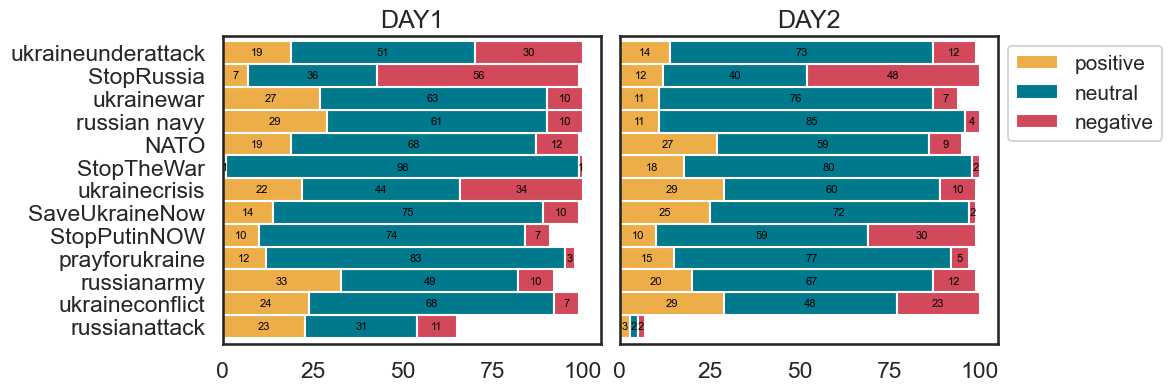

In [6]:
sns.set_context("talk")
sns.set_style("white")

fig, axes = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
ax1 = df_hash['DAY1'].plot(ax=axes[0], kind='barh', color=['#edae49', '#00798c', '#d1495b'],
                           stacked=True, legend=False, width=1)
ax2 = df_hash['DAY2'].plot(ax=axes[1], kind='barh', color=['#edae49', '#00798c', '#d1495b'], 
                           stacked=True, width=1)

for c1,c2  in zip(ax1.containers, ax2.containers):
    ax1.bar_label(c1, label_type='center', fontsize=8, c='k')
    ax2.bar_label(c2, label_type='center', fontsize=8, c='k')
    
axes[0].set_title('DAY1')
axes[1].set_title('DAY2')
axes[1].yaxis.set_visible(False)
axes[1].legend(prop={'size': 15}, bbox_to_anchor=(1., 1.0))
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

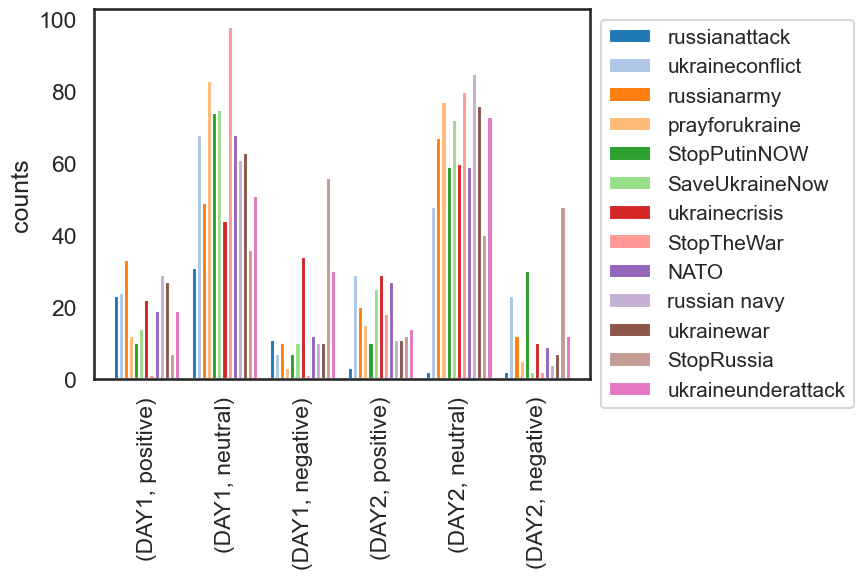

In [7]:
NUM_COLORS = 13

clrs = sns.color_palette('tab20', n_colors=NUM_COLORS) 
colors = []
for i in range(NUM_COLORS):
    colors.append(clrs[i])
    
df_hash.T.plot(kind='bar', color=colors, width=0.85)

plt.ylabel('counts')
plt.legend(prop={'size': 15}, bbox_to_anchor=(1., 1.0))
plt.show()

### The columns above present the same information as the previous ones, but I wanted to experiment with a different type of data visualization. Certain details are more prominent in these columns. The color differentiation is especially helpful when analyzing such data.

In [8]:
df_days = (pd.DataFrame(df_hash[['DAY1', 'DAY2']].sum()))

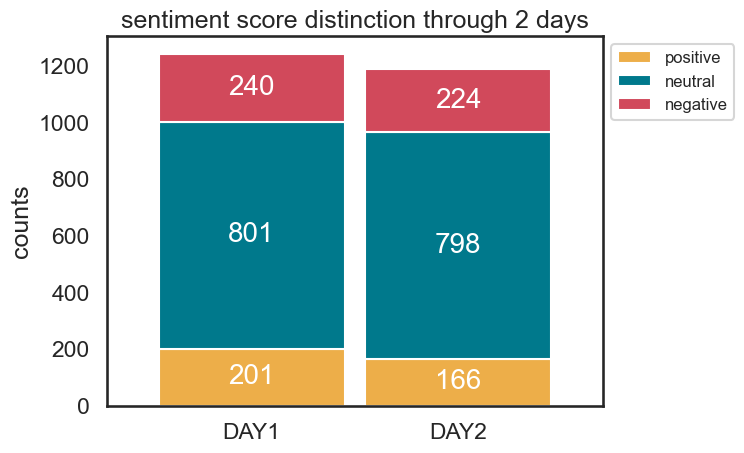

In [9]:
ax = df_days.unstack().plot(kind='bar', stacked=True, 
                               color=['#edae49', '#00798c', '#d1495b'], width=.9, align='center', rot=0)
for c  in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=20, c='w')
plt.title('sentiment score distinction through 2 days')  
plt.ylabel('counts')
plt.legend(labels=['positive', 'neutral', 'negative'], prop={'size': 12}, ncol=1, bbox_to_anchor=(1., 1.0))

### These two columns show us the overall sentiment score on the first and second days. It would be interesting to see the difference between the two days if it were to happen with a time gap of a few months, but I wanted to show here the total sentiment score. 

In [10]:
lang_data = {'sentiment_score': [], 'language': []}
for set in data_sets.keys():
    for df in data_sets[set].values():
        lang_data['sentiment_score'] += (df['sentiment_score'].values).tolist()
        lang_data['language'] += (df['language'].values).tolist()

In [11]:
df_lang = pd.DataFrame(lang_data)
df_lang.describe()

,sentiment_score
count,2430.000000
mean,0.039918
std,0.583543
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


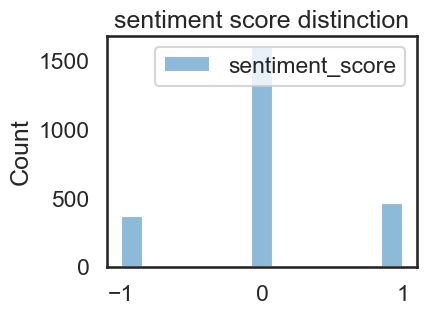

In [12]:
plt.figure(figsize=(4,3))
plt.title('sentiment score distinction')
ax = sns.histplot(df_lang)
#plt.setp(ax.get_legend().get_texts(), fontsize='12') 

### In the bar chart above, we see the total count of sentiments in all tweets. It clearly indicates that the neutral sentiment was the most frequently used. Frankly speaking, I find it a bit surprising. I would still check the actual texts to confirm whether the neutral sentiment indeed prevails.

<Figure size 500x300 with 0 Axes>

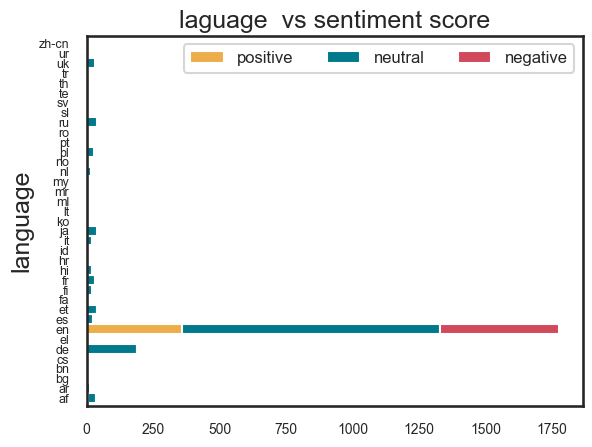

In [13]:
plt.figure(figsize=(5,3))

grouped_by_lang = (df_lang.groupby("language")[["sentiment_score"]]
       .apply(lambda group: group.apply(pd.Series.value_counts))
       .fillna(0))
grouped_by_lang = grouped_by_lang.rename(columns={"sentiment_score": "counts"})
grouped_by_lang.unstack().plot(kind='barh', stacked=True, 
                               color=['#edae49', '#00798c', '#d1495b'], width=1., align='center', rot=0)
plt.title('laguage  vs sentiment score')
plt.gca().tick_params(axis='y', which='both', labelsize=9)
plt.gca().tick_params(axis='x', which='both', labelsize=10)
plt.legend(labels=['positive', 'neutral', 'negative'], prop={'size': 12}, ncol=3)

### In the next section, I wanted to group the sentiment scores by the language in which users wrote their tweets. It is also very interesting to see how sentiments differ in different languages.

In [14]:
grouped_by_lang

counts
language sentiment_score        
af        0                   32
         -1                    5
          1                    2
ar        0                   13
bg        0                    1
bn        0                    2
cs        0                    1
de        0                  188
          1                    6
         -1                    3
el        0                    5
en        0                  970
          1                  446
         -1                  359
es        0                   25
          1                    4
et        0                   38
          1                    1
fa        0                    1
fi        0                   21
fr        0                   33
          1                    1
hi        0                   22
          1                    1
hr        0                    3
id        0                    3
          1                    1
it        0                   20
ja        0                   41
ko        0                    9
lt        0                    5
ml        0                    3
mr        0                    1
my        0                    5
nl        0                   18
          1                    1
no        0                    1
pl        0                   29
pt        0                    2
ro        0                    4
ru        0                   40
sl        0                    2
sv        0                    9
te        0                    2
          1                    1
th        0                    5
tr        0                    7
uk        0                   30
ur        0                    6
zh-cn     0                    2

### Here, I also want to examine which users we have in our dataset and whether they write their tweets once, twice, or more times. From the overall count, we have 2429 users. With this information, we can already identify if there are some bots in our dataset. In the bar chart, we observe that there are users who have already written a significant number of tweets during the two days. So, in the end, I have illustrated only the 30 most active users. During this analysis, one can track certain users and observe how their sentiment is changing and how it depends on the topic (hashtag) they are discussing.

In [15]:
users_data = {'sentiment_score': [], 'users': []}
for set in data_sets.keys():
    for df in data_sets[set].values():
        users_data['sentiment_score'] += (df['sentiment_score'].values).tolist()
        users_data['users'] += (df['user'].values).tolist()

In [16]:
df_user = pd.DataFrame(users_data)

In [17]:
df_user

,sentiment_score,users
0,-1,SHavamal
1,-1,Maczeks_Ghost2
2,0,LemStraw
3,0,managehours
4,1,AnmNews
...,...,...
2425,0,FuckPutinBot
2426,0,FuckPutinBot
2427,0,UWTracker
2428,0,UWTracker


In [18]:
import collections
counts = collections.Counter(users_data['users'])
most_common = dict(counts.most_common(99))

In [19]:
df_most_common = (df_user.loc[df_user['users'].isin(list(most_common.keys()))].reset_index()).drop(['index'], axis=1)
df_most_common

,sentiment_score,users
0,0,managehours
1,0,managehours
2,0,managehours
3,-1,managehours
4,0,managehours
...,...,...
530,0,FuckPutinBot
531,0,FuckPutinBot
532,0,UWTracker
533,0,UWTracker


In [20]:
grouped_by_user = (df_most_common.groupby("users")[["sentiment_score"]]
       .apply(lambda group: group.apply(pd.Series.value_counts))
       .fillna(0))

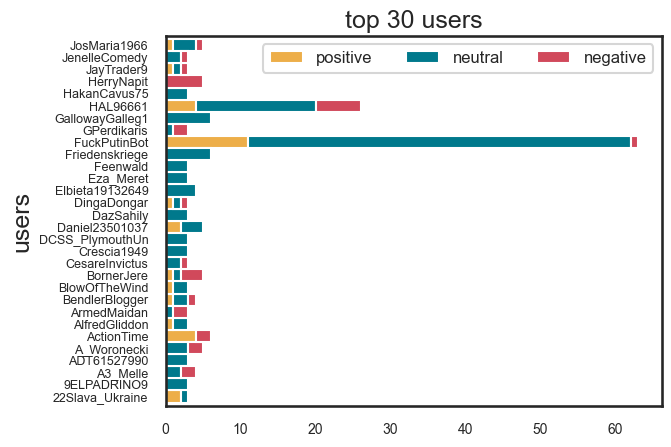

In [21]:
grouped_by_user = grouped_by_user.rename(columns={"sentiment_score": "counts"})

#top 25 
grouped_by_user.unstack()[:30].plot(kind='barh', stacked=True, 
                               color=['#edae49', '#00798c', '#d1495b'], width=1., align='center', rot=0)

plt.title('top 30 users')
plt.gca().tick_params(axis='y', which='both', labelsize=9)
plt.gca().tick_params(axis='x', which='both', labelsize=10)
plt.legend(labels=['positive', 'neutral', 'negative'], prop={'size': 12}, ncol=3)

## The exploration of this dataset has helped me understand what I can do with this data and how I am going to analyze it. My idea is to analyze how opinions change in crisis situations such as war, conflicts, and unstable times. I will closely examine the sentiments users are expressing depending on the languages they use and hashtags(topics) they write about. As mentioned above, I want to check the sentiments that were already determined in this dataset because it looks a little bit suspicious that neutrality prevails so much. It is also very interesting to know what role do hashtags play in shaping the sentiment of tweets during crises and whether certain hashtags correlate with specific sentiment trends. Additionally, I will try to find the exact date of those two days to check whether there were any important war events. My research question is still in the process of development, but I already have some ideas which I've described above. 

### Choosing all users nicknames to look closer at them. 

In [22]:
# languages_cols = np.unique(lang_data['language'])
user_rows = np.unique(users_data['users']) # choosing unique users numpy unique
df_user_detail = {}

In [23]:
len(np.unique(lang_data['language'])), len(lang_data['language'])

(37, 2430)

In [24]:
len(np.unique(users_data['users'])), len(users_data['users'])

(1843, 2430)

### Idea is to check whether are some valuable information about each user and if it's possible to distinguish some patterns according to their posts.

In [25]:
hash_ocuurence, sentiments = {}, {}
for h in hashes:
    d1, d2 = data_sets['DAY1'][h], data_sets['DAY2'][h]
    hash_ocuurence[h] = []
    sentiments['score ' + h] = []
    for user in user_rows:
        amount = len(d1.loc[d1['user'] == user]) +  len(d2.loc[d2['user'] == user])
        scores = list((d1.loc[d1['user'] == user])['sentiment_score']) + list((d2.loc[d2['user'] == user])['sentiment_score'])
        hash_ocuurence[h].append(amount), sentiments['score ' + h].append(scores)

In [26]:
for h in hashes:
    print(len(sentiments['score ' + h]), len(hash_ocuurence[h]))

1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843
1843 1843


### As result we will keep our data in dataframe with columns with sentiment score and indices as user ids. 
### This can help to differentiate most polarized users in each topic / hashtag

In [43]:
df_user_score = pd.DataFrame(sentiments)
df_user_score.index = user_rows
df_user_score

,score russianattack,score ukraineconflict,score russianarmy,score prayforukraine,score StopPutinNOW,score SaveUkraineNow,score ukrainecrisis,score StopTheWar,score NATO,score russian navy,score ukrainewar,score StopRussia,score ukraineunderattack
0419R7264968959,[],[],[],[],[],[],[],[],[],[1],[],[],[]
1776Lisafuta,[],[],[1],[],[],[],[],[],[],[],[],[],[]
1B6hQSBkqIVceet,[],[],[],[0],[],[],[],[],[],[],[],[],[]
1DeepThinker7,[],[0],[],[],[],[],[],[],[],[],[],[],[]
1hikid,[],[1],[],[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeusj,[],[],[],[],[],[],[],[],[],[],[0],[],[0]
zin86408524,[],[],[0],[],[],[],[],[],[],[],[],[],[]
zoryananich,[],[],[],[],[],[0],[],[],[],[],[],[],[]
zr04NzpB8pYOZ44,[],[],[],[],[0],[],[],[],[],[],[],[],[]


### Here we have DF with activity of each user in each hashtag (how many times users was using some hashtag)

In [44]:
df_user_hash = pd.DataFrame(hash_ocuurence)
df_user_hash.index = user_rows
df_user_hash

,russianattack,ukraineconflict,russianarmy,prayforukraine,StopPutinNOW,SaveUkraineNow,ukrainecrisis,StopTheWar,NATO,russian navy,ukrainewar,StopRussia,ukraineunderattack
0419R7264968959,0,0,0,0,0,0,0,0,0,1,0,0,0
1776Lisafuta,0,0,1,0,0,0,0,0,0,0,0,0,0
1B6hQSBkqIVceet,0,0,0,1,0,0,0,0,0,0,0,0,0
1DeepThinker7,0,1,0,0,0,0,0,0,0,0,0,0,0
1hikid,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeusj,0,0,0,0,0,0,0,0,0,0,1,0,1
zin86408524,0,0,1,0,0,0,0,0,0,0,0,0,0
zoryananich,0,0,0,0,0,1,0,0,0,0,0,0,0
zr04NzpB8pYOZ44,0,0,0,0,1,0,0,0,0,0,0,0,0


### Here we will use average to describe how positive, negative or neutral each users was (we can think about better definition or distinction)

In [45]:
def user_plot(df, ax, fontsize=12, hide_labels=False, map='hot'):
    heatmap = ax.imshow(df, aspect='auto', cmap=map)

    ax.set_xticklabels(df.columns,rotation=90, fontsize=8)
    
    ax.set_yticklabels(df.index, fontsize=8)
    cbar = plt.colorbar(heatmap)
    cbar.ax.tick_params(labelsize=10)

def mean(x):
    return np.mean(x)

df_user_score = df_user_score.applymap(mean)
df_user_score

,score russianattack,score ukraineconflict,score russianarmy,score prayforukraine,score StopPutinNOW,score SaveUkraineNow,score ukrainecrisis,score StopTheWar,score NATO,score russian navy,score ukrainewar,score StopRussia,score ukraineunderattack
0419R7264968959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1776Lisafuta,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1B6hQSBkqIVceet,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1DeepThinker7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1hikid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeusj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
zin86408524,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoryananich,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zr04NzpB8pYOZ44,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Activity plot

### Visualisation of users activity - the brigher color the more users was posting on specific hastag

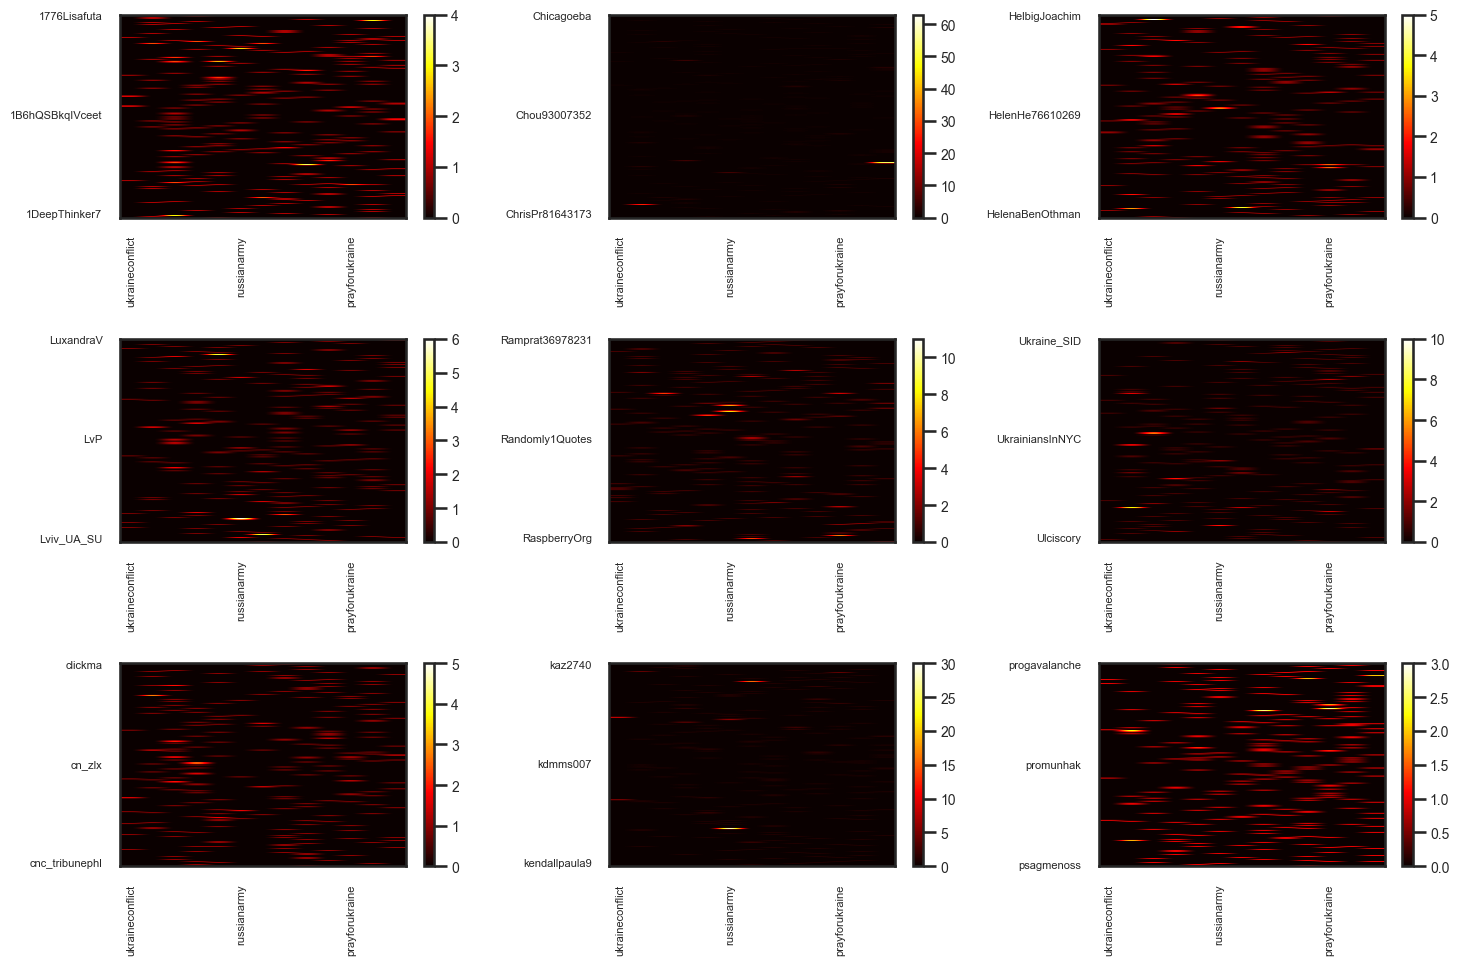

In [46]:
fig, axs = plt.subplots(3,3, layout=None , figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    user_plot(df_user_hash[i*205:(i+1)*205], ax)
plt.tight_layout()

### Here we visualise average sentiment score 

Here for empty list after applying np  mean we get NaN which we replace by value of -5 to make better plot (thinks about better solution)

In [47]:
df_user_score = df_user_score.replace(np.NaN,-5)

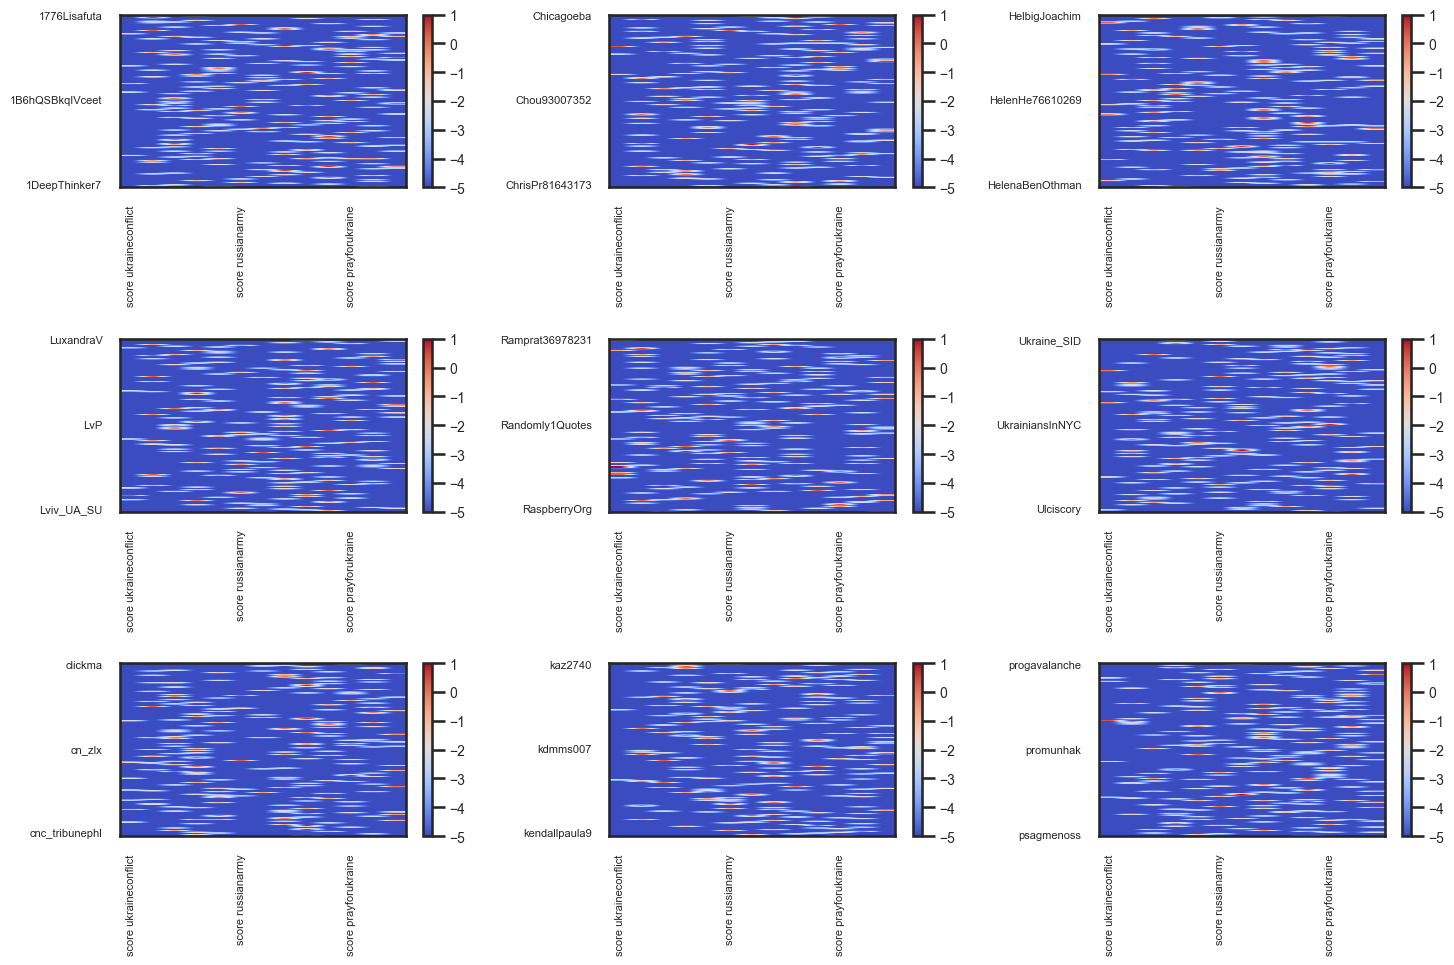

In [48]:
fig, axs = plt.subplots(3,3, layout=None , figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    user_plot(df_user_score[i*205:(i+1)*205], ax,  map='coolwarm')
plt.tight_layout()